## So let’s begin here…

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import os

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [24]:
train_folder= '/content/drive/MyDrive/dataset/Archive/train'
val_folder = '/content/drive/MyDrive/dataset/Archive/val'
test_folder = '/content/drive/MyDrive/dataset/Archive/test'

### Train Data

In [25]:
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

## Defining Model

In [26]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(32, (3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(activation = 'relu', units = 128))
cnn_model.add(Dense(activation = 'sigmoid', units = 1))

## Compile Model

In [29]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [31]:

train_set = train_datagen.flow_from_directory(train_folder,
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(val_folder,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Fit Model

In [32]:
cnn_model_his = cnn_model.fit(train_set,
                              steps_per_epoch = 163,
                              epochs = 10,
                              validation_data = validation_set,
                              validation_steps = 624)

Epoch 1/10
163/163 [==============================] - ETA: 0s - loss: 0.4482 - accuracy: 0.8027

163/163 [==============================] - 546s 3s/step - loss: 0.4482 - accuracy: 0.8027 - val_loss: 0.5353 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 219s 1s/step - loss: 0.2262 - accuracy: 0.9064
Epoch 3/10
163/163 [==============================] - 219s 1s/step - loss: 0.1861 - accuracy: 0.9237
Epoch 4/10
163/163 [==============================] - 217s 1s/step - loss: 0.1674 - accuracy: 0.9327
Epoch 5/10
163/163 [==============================] - 221s 1s/step - loss: 0.1517 - accuracy: 0.9371
Epoch 6/10
163/163 [==============================] - 216s 1s/step - loss: 0.1425 - accuracy: 0.9429
Epoch 7/10
163/163 [==============================] - 215s 1s/step - loss: 0.1413 - accuracy: 0.9473
Epoch 8/10
163/163 [==============================] - 224s 1s/step - loss: 0.1450 - accuracy: 0.9450
Epoch 9/10
163/163 [==============================] - 222s 1s/step - loss: 0.1449 - accuracy: 0.9456
Epoch 10/10
163/163 [==============================] - 244s 

## Evaluate Model

### Accuracy

In [ ]:
test_acc = cnn_model.evaluate(test_set)
print('The testing accuracy is :',test_acc[1]*100, '%')

The testing accuracy is : 91.36195778846741 %


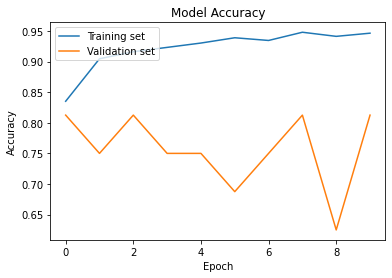

In [ ]:
plt.plot(cnn_model_his.history['accuracy'])
plt.plot(cnn_model_his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

### Loss

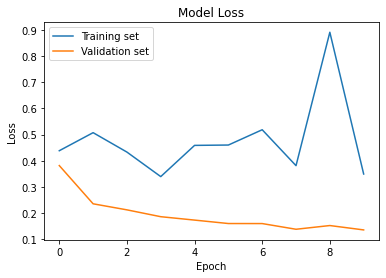

In [ ]:
plt.plot(cnn_model_his.history['val_loss'])
plt.plot(cnn_model_his.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()